<!-- Logo al 25% -->
<td width="45%" align="left" valign="middle">
  <img src="https://www.upc.edu/comunicacio/ca/identitat/descarrega-arxius-grafics/fitxers-marca-principal/upc-positiu-p3005.png" width="300">
</td>

<!-- Texto al 75%, alineado a la derecha -->
<td width="5%" align="right" valign="middle">
  <p style="margin: 0;"><b>Intelligence Data Science and Artificial Intelligence (IDEAI)</b></p>
  <p style="margin: 0;"><b>Grau en Estadística (UB - UPC)</b></p>
  <p style="margin: 0;">Mètodes Estadístics per la Mineria de Dades (MeMDa)</p>
</td>

# 🤖 **Object Detection**

https://huggingface.co/docs/transformers/tasks/object_detection

In [12]:
from transformers import AutoModelForObjectDetection, pipeline
import PIL.Image
# Crea una instància de la funció pipeline "object-detection" que preentrena el model i el tokenizer
model = pipeline('object-detection')

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

In [13]:
import pprint

# Carreguem una imatge per a realitzar la detecció d'objectes visuals
with PIL.Image.open('imagen_ejemplo.jpg') as image:
    results = model(image)
    pprint.pprint(results)

[{'box': {'xmax': 53, 'xmin': 32, 'ymax': 429, 'ymin': 394},
  'label': 'handbag',
  'score': 0.7829773426055908},
 {'box': {'xmax': 256, 'xmin': 194, 'ymax': 525, 'ymin': 359},
  'label': 'person',
  'score': 0.9721444249153137},
 {'box': {'xmax': 445, 'xmin': 413, 'ymax': 442, 'ymin': 349},
  'label': 'person',
  'score': 0.7366140484809875},
 {'box': {'xmax': 491, 'xmin': 448, 'ymax': 450, 'ymin': 351},
  'label': 'person',
  'score': 0.9750186204910278},
 {'box': {'xmax': 516, 'xmin': 490, 'ymax': 443, 'ymin': 355},
  'label': 'person',
  'score': 0.732694685459137},
 {'box': {'xmax': 299, 'xmin': 263, 'ymax': 461, 'ymin': 356},
  'label': 'person',
  'score': 0.5324442982673645},
 {'box': {'xmax': 870, 'xmin': 831, 'ymax': 456, 'ymin': 349},
  'label': 'person',
  'score': 0.9651704430580139},
 {'box': {'xmax': 775, 'xmin': 737, 'ymax': 469, 'ymin': 355},
  'label': 'person',
  'score': 0.955024778842926},
 {'box': {'xmax': 908, 'xmin': 875, 'ymax': 431, 'ymin': 352},
  'label': '

In [14]:
# Draw bounding box definition
def draw_bounding_box(im, score, label, xmin, ymin, xmax, ymax, index, num_boxes):
 """ Draw a bounding box. """

 print(f"Drawing bounding box {index} of {num_boxes}...")

 # Draw the actual bounding box
 im_with_rectangle = ImageDraw.Draw(im)
 im_with_rectangle.rounded_rectangle((xmin, ymin, xmax, ymax), outline = "blue", width = 1, radius = 2)

 # Draw the label
 im_with_rectangle.text((xmin+35, ymin-25), label, fill="white", stroke_fill = "blue", font = font)

 # Return the intermediate result
 return im

In [15]:
from PIL import Image, ImageDraw, ImageFont

font = ImageFont.truetype("Comic Sans MS.ttf", 18)


# Open the image
with Image.open("imagen_ejemplo.jpg") as im:

 # Perform object detection
 bounding_boxes = model(im)

 # Iteration elements
 num_boxes = len(bounding_boxes)
 index = 0

 # Draw bounding box for each result
 for bounding_box in bounding_boxes:

  # Get actual box
  box = bounding_box["box"]

  # Draw the bounding box
  im = draw_bounding_box(im, bounding_box["score"], bounding_box["label"],\
   box["xmin"], box["ymin"], box["xmax"], box["ymax"], index, num_boxes)

  # Increase index by one
  index += 1

 # Save image
 #im.save("street_bboxes.jpg")

 # Done
 print("Done!")

Drawing bounding box 0 of 36...
Drawing bounding box 1 of 36...
Drawing bounding box 2 of 36...
Drawing bounding box 3 of 36...
Drawing bounding box 4 of 36...
Drawing bounding box 5 of 36...
Drawing bounding box 6 of 36...
Drawing bounding box 7 of 36...
Drawing bounding box 8 of 36...
Drawing bounding box 9 of 36...
Drawing bounding box 10 of 36...
Drawing bounding box 11 of 36...
Drawing bounding box 12 of 36...
Drawing bounding box 13 of 36...
Drawing bounding box 14 of 36...
Drawing bounding box 15 of 36...
Drawing bounding box 16 of 36...
Drawing bounding box 17 of 36...
Drawing bounding box 18 of 36...
Drawing bounding box 19 of 36...
Drawing bounding box 20 of 36...
Drawing bounding box 21 of 36...
Drawing bounding box 22 of 36...
Drawing bounding box 23 of 36...
Drawing bounding box 24 of 36...
Drawing bounding box 25 of 36...
Drawing bounding box 26 of 36...
Drawing bounding box 27 of 36...
Drawing bounding box 28 of 36...
Drawing bounding box 29 of 36...
Drawing bounding box

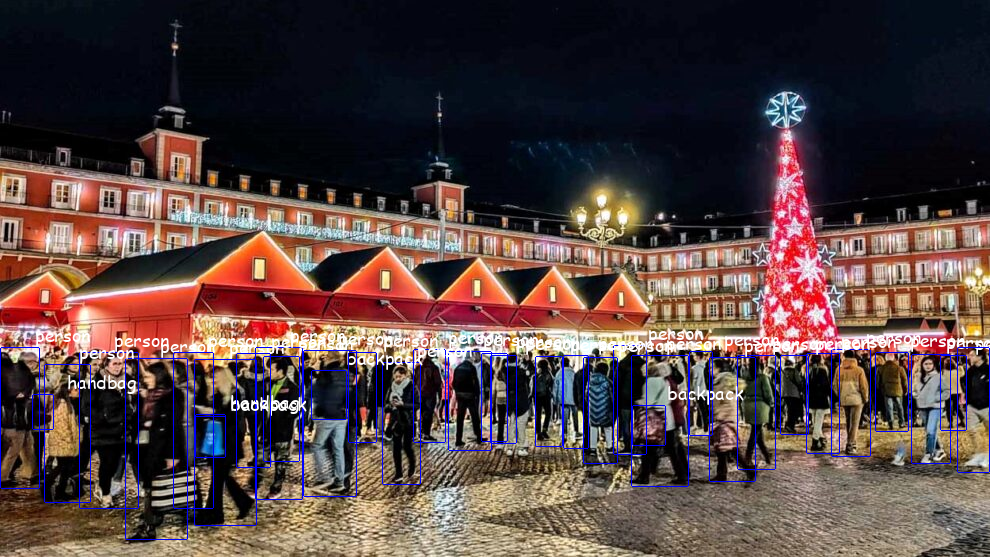

In [16]:
im